In [1]:
library(ggplot2)
set.seed(139)

m <- 650
lambda <- 1.32
alpha <- 1 - 0.93
dimensions <- seq(100, 5000, 100)

calculate_mean_widths <- function(n) {
  widths <- c()
  for (i in 1:m) {
    samples <- rexp(n, rate=lambda)
    upper_bound <- ((1 + qnorm(1-alpha/2)/sqrt(n))/mean(samples))
    lower_bound <- ((1 - qnorm(1-alpha/2)/sqrt(n))/mean(samples))
    widths <- c(widths, abs(upper_bound - lower_bound))
  }
  return (mean(widths))
}

mean_widths <- c()
for (n in dimensions) {
  mean_widths <- c(mean_widths, calculate_mean_widths(n))
}

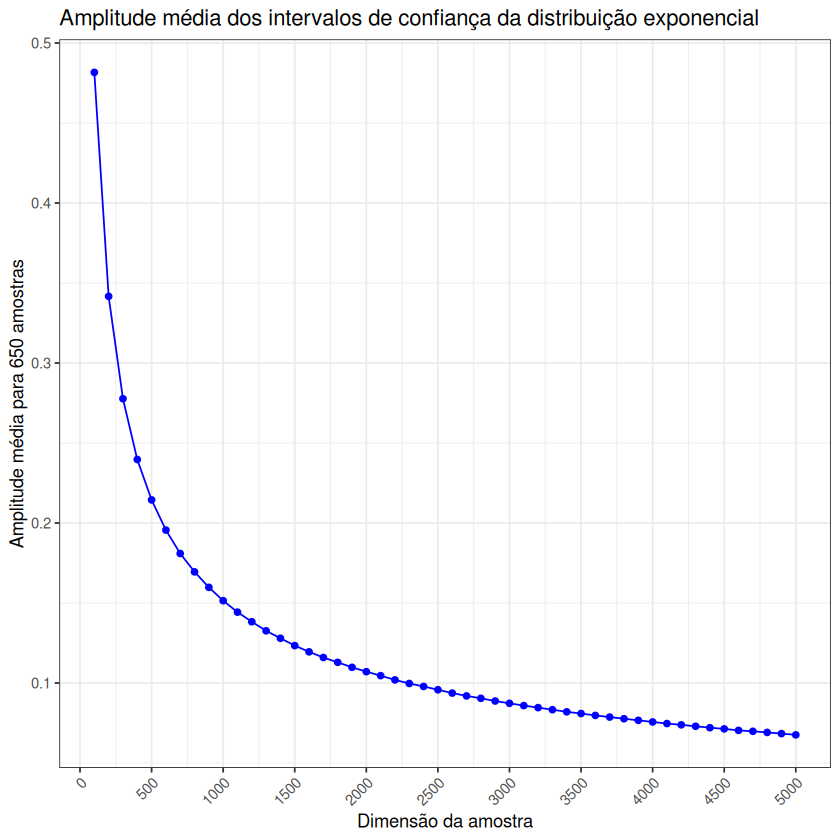

In [2]:
ggplot(data.frame(dimensions, mean_widths), aes(x=dimensions, y=mean_widths)) +
  geom_line(color="blue") +
  geom_point(color="blue") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Dimensão da amostra") + ylab("Amplitude média para 650 amostras") +
  ggtitle("Amplitude média dos intervalos de confiança da distribuição exponencial") +
  scale_x_continuous(breaks = round(seq(0, 5000, 500)))